In [1]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from collections import Counter

sys.path.append('../')

In [2]:
from configs.config import CONF

In [7]:
X = np.load(os.path.join(CONF.PATH.DATASET, "all+comp", "X_test_filtered.npy"))
y = np.load(os.path.join(CONF.PATH.DATASET, "all+comp", "y_test_filtered.npy"))
X = X.reshape(-1, 20, 20)
X.shape, y.shape

((60000, 20, 20), (60000,))

In [8]:
from typing import List, Tuple

import matplotlib.patches as patches
import numpy as np
from PIL import Image

# Ref) https://cocodrips.hateblo.jp/entry/2020/05/04/210156

def add_bboxes_to_image(ax, image: np.ndarray,
                        bboxes: List[Tuple[int, int, int, int]],
                        labels: List[str] = None,
                        label_size: int = 10,
                        line_width: int = 2,
                        border_color=(0, 1, 0, 1)) -> None:
    """
    Add bbox to ax

    :param image: dtype=np.uint8
    :param bbox: [(left, top, right, bottom)]
    :param label: List[str] or None
    :return: ax
    """
    # Display the image
    ax.imshow(image, cmap='gray')

    if labels is None:
        labels = [None] * len(bboxes)

    for bbox, label in zip(bboxes, labels):
        # Add bounding box
        top, left, bottom, right = bbox
        rect = patches.Rectangle((left, top), right - left, bottom - top,
                                 linewidth=line_width,
                                 edgecolor=border_color,
                                 facecolor='none')
        ax.add_patch(rect)

        # label
        if label:
            bbox_props = dict(boxstyle="square,pad=0",
                              linewidth=line_width, facecolor=border_color,
                              edgecolor=border_color)
            ax.text(left, top, label,
                    ha="left", va="bottom", rotation=0,
                    size=label_size, bbox=bbox_props)
    return ax

def show(X_data, y_data, data_dicts_df):
    fig, axes = plt.subplots(3, 10, figsize=(15, 4.5))
    for i in range(3):
        for j in range(10):
            index = i*10+j
            data = X_data[index]
            label = y_data[index]
            data_dict = data_dicts_df.iloc[index]
            add_bboxes_to_image(axes[i,j], data, data_dict["boxes"], data_dict["labels"])
            axes[i,j].set_title(f"ID: {data_dict['image_id']}, Label: {label}", fontsize=6)
            axes[i,j].axis('off')
    plt.show()

In [9]:
result_df = pd.read_json(
    os.path.join(
        CONF.PATH.OUTPUT,
        "20231117-200331_comp_det_resnet_34_np",
        "eval_result_7.000.json",
    )
)
result_df.head()

,target,pred,image_id,boxes,labels
0,11,8,0,"[[1, 13, 15, 19], [4, 1, 18, 8]]","[6, 2]"
1,6,8,1,"[[1, 13, 15, 19], [4, 1, 18, 8]]","[6, 2]"
2,1,8,2,"[[1, 13, 15, 19], [4, 1, 18, 8]]","[6, 2]"
3,7,8,3,"[[1, 13, 15, 19], [4, 1, 18, 8]]","[6, 2]"
4,2,8,4,"[[1, 13, 15, 19], [4, 1, 18, 8]]","[6, 2]"


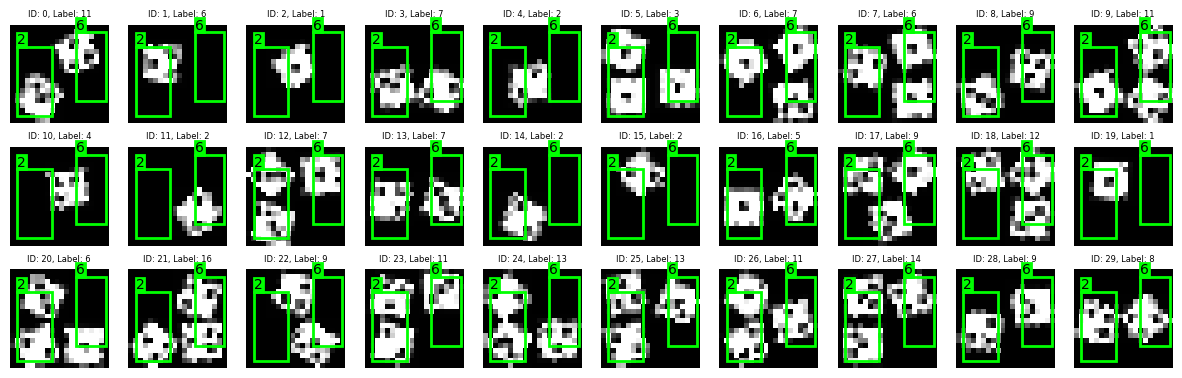

In [12]:
fig, axes = plt.subplots(3, 10, figsize=(15, 4.5))
for i in range(3):
    for j in range(10):
        data, label, data_dict = X[i*10+j], y[i*10+j], result_df.iloc[i*10+j]
        add_bboxes_to_image(axes[i,j], data, data_dict["boxes"], data_dict["labels"])
        axes[i,j].set_title(f"ID: {data_dict['image_id']}, Label: {label}", fontsize=6)
        axes[i,j].axis('off')
plt.show()